<a href="https://colab.research.google.com/github/Zerowl7/Covid_Lombardia/blob/main/Test_Minaev_(Covid_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Постановка задачи:
1. Скачать файл со статистическими данными по COVID-19 для областей Италии
2. В полученном файле необходимо найти данные по выявленным случаям
COVID-19 и умершим от COVID-19 для Ломбардии (область Италии)
3. Для полученных данных рассчитать ежедневное количество выявленных
случаев и умерших на 1 млн населения. Население указать в отдельной ячейке
со ссылкой на источник. Расчетные данные представить в виде таблицы
4. Также необходимо построить два графика:
a. график, показывающий ежедневное количество выявленных случаев
COVID-19, рассчитанных на 1 млн населения
b. график, показывающий ежедневное количество умерших от COVID-19,
рассчитанных на 1 млн населения

1. Скачать файл со статистическими данными по COVID-19 для областей Италии

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
covid_italy = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

In [4]:
covid_italy.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
covid_italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18921 entries, 0 to 18920
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    18921 non-null  object 
 1   stato                                   18921 non-null  object 
 2   codice_regione                          18921 non-null  int64  
 3   denominazione_regione                   18921 non-null  object 
 4   lat                                     18921 non-null  float64
 5   long                                    18921 non-null  float64
 6   ricoverati_con_sintomi                  18921 non-null  int64  
 7   terapia_intensiva                       18921 non-null  int64  
 8   totale_ospedalizzati                    18921 non-null  int64  
 9   isolamento_domiciliare                  18921 non-null  int64  
 10  totale_positivi                         18921 non-null  in

In [6]:
covid_italy.describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,...,3402.000000,3402.00000,1.892100e+04,1.892100e+04,1.776600e+04,12978.000000,1.207500e+04,1.207500e+04,1.207500e+04,1.207500e+04
mean,11.857143,43.046293,12.225955,527.916178,55.164103,583.080281,22883.098673,23466.178637,48.343481,1118.089636,...,16472.772193,6319.39565,2.683130e+05,3.976923e+06,1.371895e+06,3.813299,2.700818e+05,1.352374e+05,3.136720e+06,2.835836e+06
std,6.273964,2.488847,2.659018,969.860343,107.510835,1072.465134,45191.416755,45630.558061,2225.790166,2634.038636,...,32188.413270,15054.35195,4.626168e+05,6.297824e+06,1.699781e+06,6.459032,2.915143e+05,2.751328e+05,3.195709e+06,4.269993e+06
min,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-50797.000000,-229.000000,...,0.000000,0.00000,0.000000e+00,0.000000e+00,3.482000e+03,-2.000000,7.382000e+03,0.000000e+00,6.615200e+04,0.000000e+00
25%,7.000000,41.125596,11.121231,48.000000,4.000000,53.000000,967.000000,1084.000000,-77.000000,38.000000,...,2052.250000,117.00000,1.196300e+04,2.789120e+05,2.123948e+05,0.000000,6.158250e+04,1.700000e+01,8.289250e+05,2.436475e+05
50%,12.000000,43.616760,12.388247,192.000000,18.000000,213.000000,5618.000000,5951.000000,3.000000,234.000000,...,5290.500000,1493.00000,7.656300e+04,1.393333e+06,6.881195e+05,2.000000,1.619650e+05,1.233000e+04,1.942523e+06,1.177664e+06
75%,17.000000,45.434905,13.768136,577.000000,54.000000,633.000000,21973.000000,22854.000000,137.000000,1021.000000,...,19285.750000,5469.00000,3.207800e+05,4.925881e+06,1.877696e+06,4.000000,3.951700e+05,1.283060e+05,4.566824e+06,3.234166e+06
max,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,574548.000000,578257.000000,47483.000000,52693.000000,...,305002.000000,113150.00000,3.421475e+06,4.042305e+07,9.058444e+06,86.000000,1.475499e+06,1.945976e+06,1.640578e+07,2.401728e+07


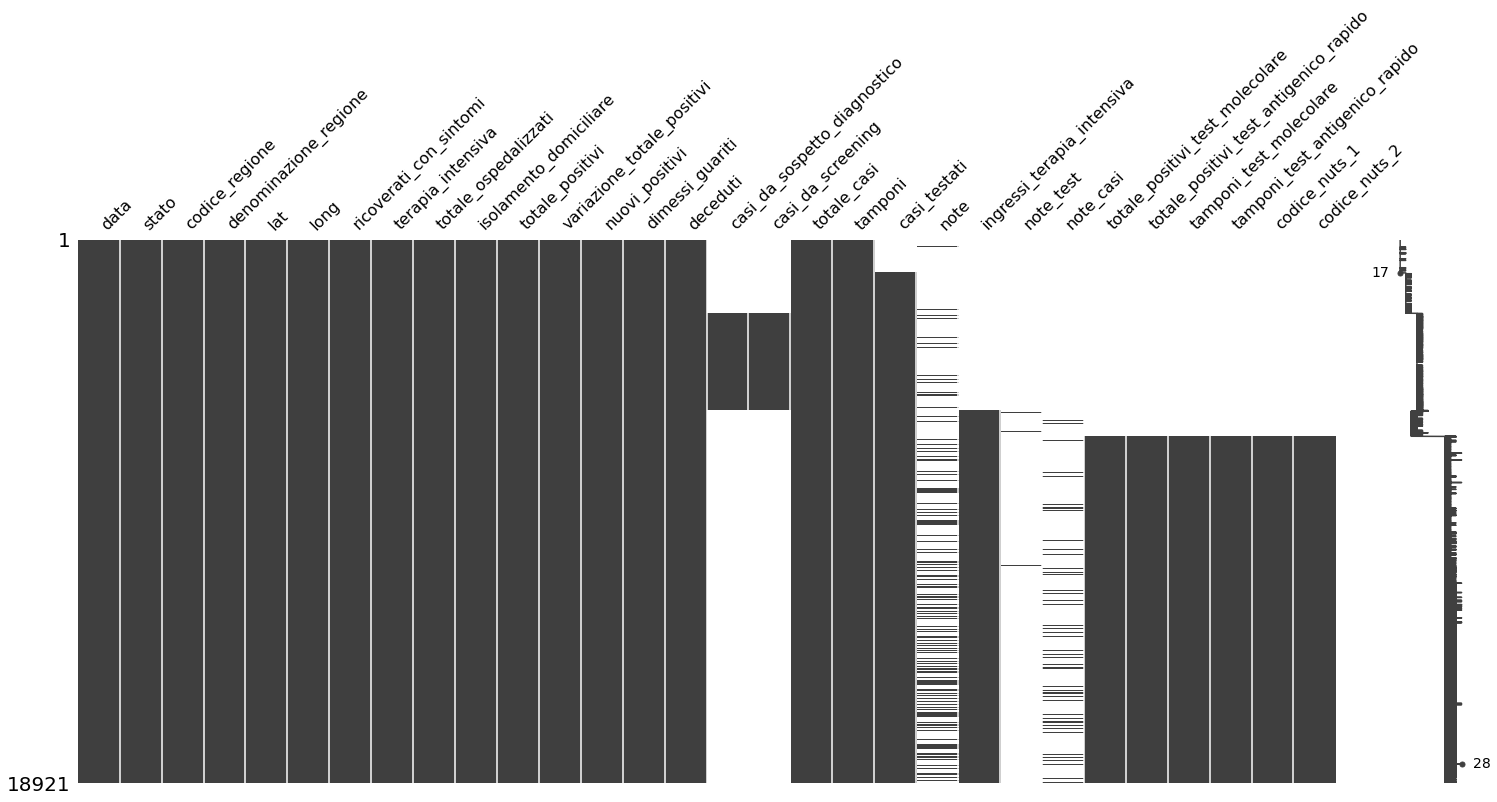

In [7]:
import missingno as msno
msno.matrix(covid_italy);

Видим, что данных мало в записях, а также в скрининге, они странным образом распределенны, тесты tamponi появляются позже

In [8]:
print(covid_italy.columns)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')


Примерная расшифровка

'дата', 'data'

'состояние',  'stato'

'код_региона',  'codice_regione'

'именование региона',  'denominazione regione'

'широта',  'lat'

"долго",  'long'

"госпитализированы с симптомами", 'ricoverati con sintomi'

"реанимация",  'terapia intensiva'

всего госпитализированных',  'totale ospedalizzati'

'изоляции на дому',  'isolamento domiciliare'

'итого положительные', 'totale positivi'

"общее изменение положительных результатов",  'variazione totale positivi'

"новые положительные результаты", 'nuovi positivi'

"выписанные выздоровели",  'dimessi guariti'

'умерших',  'deceduti'

'casi_da диагностики подозрение',  'casi_da sospetto diagnostico'

'случаев от скрининга,  'casi da screening'

'все кейсы',  'totale_casi'

'тампоны', 'tamponi'

'проверенные случаи', 'casi testati'

'Примечания', 'note'

"входы в реанимацию", 'ingressi terapia intensiva'

"заметки о тестах", 'note test'

"заметки о случаях", 'note casi'

"общий положительный молекулярный тест",  'totale positivi test molecolare'

""общий положительный тест на антиген_быстрый", ''totale positive test antigenico_rapido'

"молекулярный тест на тампоны",  'tamponi test molecolare'

"быстрый тест на антиген тампоны", ''tamponi test antigenico rapido'
"орехи код 1",  'codice nuts 1'

2. В полученном файле необходимо найти данные по выявленным случаям COVID-19 и умершим от COVID-19 для Ломбардии (область Италии)

---




Область - 
denominazione_regione

Выявленные случаи - 
я предполагаю, что это total_positive

Умершие - 
 'deceduti'


Ищу тот регион, который нам подходит
'Lombardia'

In [9]:
print(covid_italy['denominazione_regione'].unique())

['Abruzzo' 'Basilicata' 'Calabria' 'Campania' 'Emilia-Romagna'
 'Friuli Venezia Giulia' 'Lazio' 'Liguria' 'Lombardia' 'Marche' 'Molise'
 'P.A. Bolzano' 'P.A. Trento' 'Piemonte' 'Puglia' 'Sardegna' 'Sicilia'
 'Toscana' 'Umbria' "Valle d'Aosta" 'Veneto']


Здесь я считаю запрос умерших по Ломбардии суммируя значения по столбцу deceduti

Я получаю число - 41 708 чел

Положительных случаев - 578 257 чел

Видимо в датафрейме при добавлении умершего возникает каждая новая строчка, я сначала попытался суммировать, вышло больше чем попуялция))

Популяция ломбардии - 10,06 млн

In [10]:
covid_italy.query('denominazione_regione == "Lombardia"')\
        .deceduti\
        .max()

41919

In [56]:
covid_italy.query('denominazione_regione == "Lombardia"')\
        .totale_positivi\
        .max()


578257

3. Для полученных данных рассчитать ежедневное количество выявленных
случаев и умерших на 1 млн населения. 

Население указать в отдельной ячейке
со ссылкой на источник. Расчетные данные представить в виде таблицы



Датафрейм начинается с 2020-02-24 по 2022-08-05

In [12]:
print(len(pd.to_datetime(covid_italy['data']).dt.date.unique()))

901


Таким образом я получил 894 дня 

In [13]:
death = 41708/894

In [14]:
positive = 578257/894

In [15]:
data = {'death_mean': [death], 'positive': [positive]}

In [16]:
df = pd.DataFrame(data)

In [17]:
df

,death_mean,positive
0,46.653244,646.819911


Ядумаю, то этот ответ правильный, но мне хотелось бы подробнее это разобрать, так как я не понимаю, какую ссылку здесь запрашивают и как вычислить это на 1 млн. населения

4. Также необходимо построить два графика: 

a. график, показывающий ежедневное количество выявленных случаев COVID-19, рассчитанных на 1 млн населения 

b. график, показывающий ежедневное количество умерших от COVID-19, рассчитанных на 1 млн населения

In [26]:
import matplotlib.dates
from datetime import datetime
import matplotlib.dates as mdates

In [39]:
covid_italy['year'] = pd.to_datetime(covid_italy['data']).dt.year # we store the year in a separate column
covid_italy['month'] = pd.to_datetime(covid_italy['data']).dt.month # we store the year in a separate column

In [45]:
covid_italy["date"] = pd.to_datetime(covid_italy["data"])

In [48]:
date = covid_italy["date"]

In [46]:
covid_italy.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,year,month,date
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,2020-02-24 18:00:00
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,2020-02-24 18:00:00
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,2020-02-24 18:00:00
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,2020-02-24 18:00:00
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,2020-02-24 18:00:00


Вот этот сайт маст хев https://www.python-graph-gallery.com/

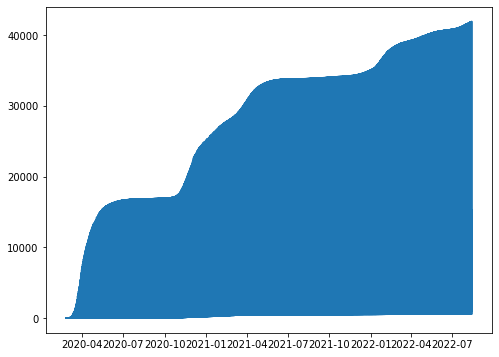

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, covid_italy.deceduti);

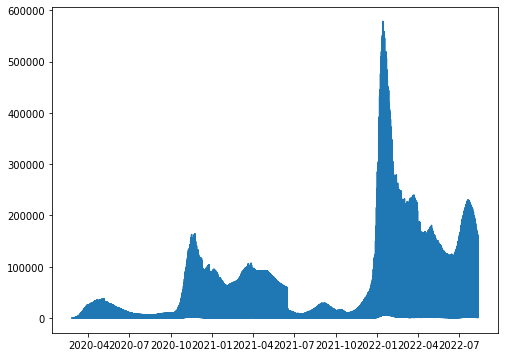

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, covid_italy.totale_positivi);

In [54]:
covid_italy.totale_positivi.describe()

count     18921.000000
mean      23466.178637
std       45630.558061
min           0.000000
25%        1084.000000
50%        5951.000000
75%       22854.000000
max      578257.000000
Name: totale_positivi, dtype: float64